#Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.layers import Dropout
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras import regularizers
import seaborn as sns

#Uploading Dataset

In [ ]:
uploaded = files.upload()

Saving House_Price_Data.csv to House_Price_Data.csv


#Extracting Data into DataFrame

In [ ]:
dataFrame=pd.read_csv("/content/House_Price_Data.csv")
dataFrame

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

#Exploratory Data Analysis

In [ ]:
dataFrame.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [ ]:
dataFrameOne=dataFrame.iloc[:,2:8]
dataFrameOne["yr_built"]=dataFrame["yr_built"]

In [ ]:
dataFrameOne

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  yr_built
0      221900.0         3       1.00         1180      5650     1.0      1955
1      538000.0         3       2.25         2570      7242     2.0      1951
2      180000.0         2       1.00          770     10000     1.0      1933
3      604000.0         4       3.00         1960      5000     1.0      1965
4      510000.0         3       2.00         1680      8080     1.0      1987
...         ...       ...        ...          ...       ...     ...       ...
21608  360000.0         3       2.50         1530      1131     3.0      2009
21609  400000.0         4       2.50         2310      5813     2.0      2014
21610  402101.0         2       0.75         1020      1350     2.0      2009
21611  400000.0         3       2.50         1600      2388     2.0      2004
21612  325000.0         2       0.75         1020      1076     2.0      2008

[21613 rows x 7 columns]

#Removing Missing values Error

In [ ]:
imputer = SimpleImputer(strategy='mean',missing_values=np.nan)
dataFrameOne=pd.DataFrame(imputer.fit_transform(dataFrameOne.iloc[:,:]), columns=dataFrameOne.columns)
dataFrameOne

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  yr_built
0      221900.0       3.0       1.00       1180.0    5650.0     1.0    1955.0
1      538000.0       3.0       2.25       2570.0    7242.0     2.0    1951.0
2      180000.0       2.0       1.00        770.0   10000.0     1.0    1933.0
3      604000.0       4.0       3.00       1960.0    5000.0     1.0    1965.0
4      510000.0       3.0       2.00       1680.0    8080.0     1.0    1987.0
...         ...       ...        ...          ...       ...     ...       ...
21608  360000.0       3.0       2.50       1530.0    1131.0     3.0    2009.0
21609  400000.0       4.0       2.50       2310.0    5813.0     2.0    2014.0
21610  402101.0       2.0       0.75       1020.0    1350.0     2.0    2009.0
21611  400000.0       3.0       2.50       1600.0    2388.0     2.0    2004.0
21612  325000.0       2.0       0.75       1020.0    1076.0     2.0    2008.0

[21613 rows x 7 columns]

#Visualizing Data

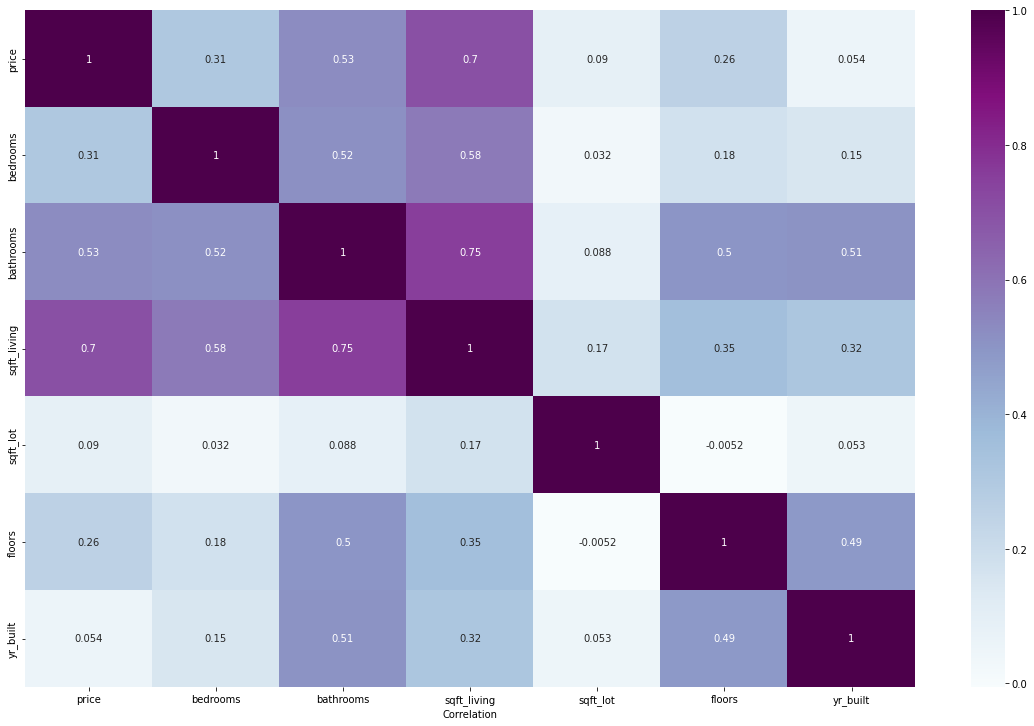

In [ ]:
figure = plt.figure(figsize=(16, 10))
sns.heatmap(dataFrameOne.corr(), annot=True,cmap='BuPu')
plt.tight_layout()
plt.xlabel('Correlation')
plt.show()

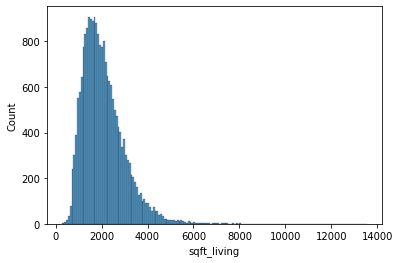

In [ ]:
sns.histplot(dataFrameOne['sqft_living']) 
plt.show()

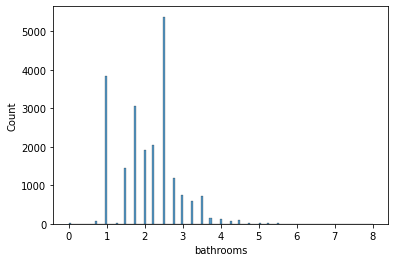

In [ ]:
sns.histplot(dataFrameOne['bathrooms']) 
plt.show()

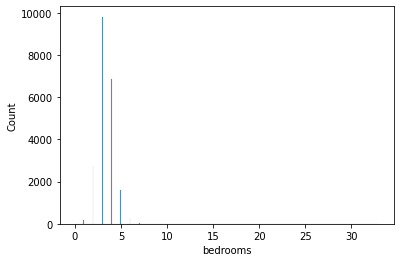

In [ ]:
sns.histplot(dataFrameOne['bedrooms']) 
plt.show()

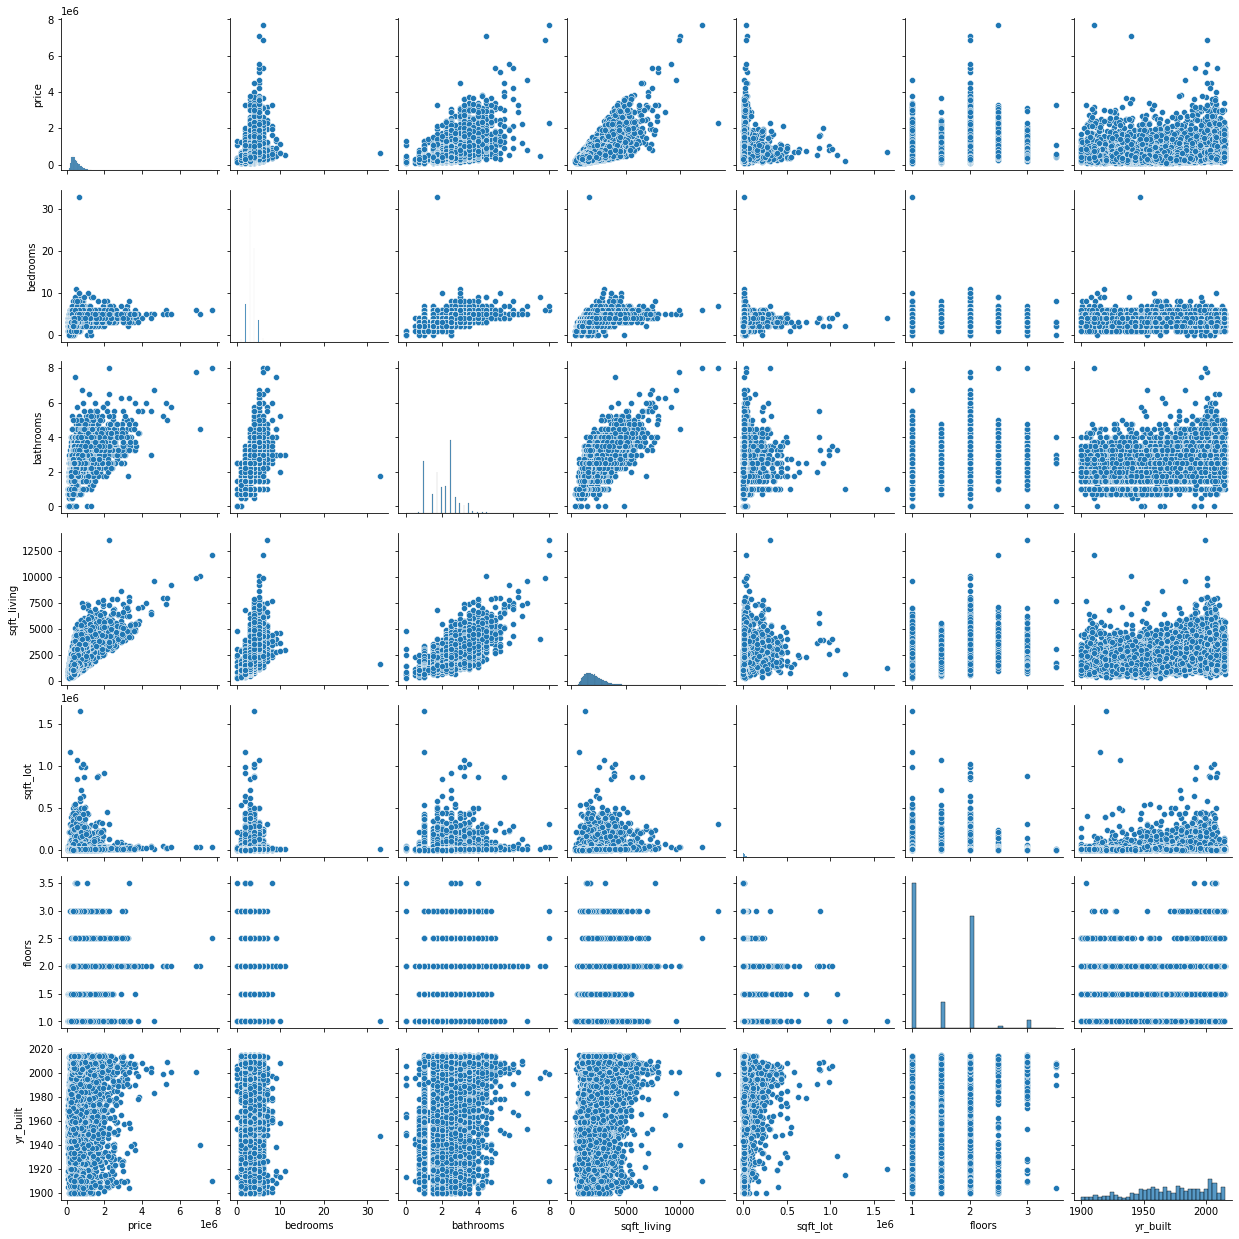

In [ ]:
sns.pairplot(dataFrameOne)

#Scaling the data

In [ ]:
scaler=StandardScaler()
X=dataFrameOne.iloc[:,1:]
X=scaler.fit_transform(X)
print("X:\n",X);

X:
 [[-0.39873715 -1.44746357 -0.97983502 -0.22832133 -0.915427   -0.54489777]
 [-0.39873715  0.1756067   0.53363434 -0.18988538  0.93650577 -0.6810785 ]
 [-1.47395936 -1.44746357 -1.42625404 -0.12329847 -0.915427   -1.29389179]
 ...
 [-1.47395936 -1.77207762 -1.15404732 -0.33213703  0.93650577  1.29354209]
 [-0.39873715  0.50022075 -0.52252773 -0.30707641  0.93650577  1.12331618]
 [-1.47395936 -1.77207762 -1.15404732 -0.33875227  0.93650577  1.25949691]]


In [ ]:
y=np.array(dataFrameOne.iloc[:,0:1])
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

#Spliting Data into Train and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=28)

In [ ]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

#Q.Explain the significance of Dropout and regularization
Sol:-Dropout prevents overfitting by randomly shutting down some output units.
In the process above, in each iteration, some units would be randomly muted, meaning that there would be less neurons working in the forward process, thus the overall structure of neural network is simplified.
Meanwhile, the trained model would be more robust, since the model no longer can rely on any specific neurons anymore (as they could be muted in the process), all other neurons would need to learn in the training.
Regularization helps to prevent model from overfitting by adding an extra penalization term at the end of the loss function.L2 regularization applies square to weights
The appended extra term would enlarge the loss when either there are too many weights or the weight becomes too large, and the adjustable factor λ put an emphasis on how much we want to penalize the weights.

#Model Building

In [ ]:
model = Sequential()
model = keras.Sequential()
model.add(keras.Input(shape=(6,)))
model.add(layers.Dense(512, activation="tanh"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(1,activation=LeakyReLU(alpha=0.0441)))
adam = keras.optimizers.Adam(learning_rate=0.00425)
model.compile(loss=root_mean_squared_error, optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
rmse=tf.keras.metrics.RootMeanSquaredError()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               3584      
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69,377
Trainable params: 69,377
Non-trainable params: 0
_________________________________________________________________


#Q.Explain how validation set works.

sol:-The validation set is used to evaluate a given model, but this is for frequent evaluation.Hence the model occasionally sees this data, but never does it “Learn” from this. We use the validation set results, and update higher level hyperparameters. So the validation set affects a model, but only indirectly.

#Training the Model

In [ ]:
history=model.fit(X_train,y_train,batch_size=48, epochs=100,validation_split = 0.0989)

Epoch 1/100
325/325 [==============================] - 4s 3ms/step - loss: 638449.8125 - mean_absolute_error: 536962.0625 - val_loss: 652031.5625 - val_mean_absolute_error: 542357.6875
Epoch 2/100
325/325 [==============================] - 1s 3ms/step - loss: 629263.6250 - mean_absolute_error: 525498.1875 - val_loss: 637792.4375 - val_mean_absolute_error: 524487.9375
Epoch 3/100
325/325 [==============================] - 1s 3ms/step - loss: 610415.2500 - mean_absolute_error: 502113.7812 - val_loss: 615670.4375 - val_mean_absolute_error: 495898.7188
Epoch 4/100
325/325 [==============================] - 1s 3ms/step - loss: 584597.1250 - mean_absolute_error: 469080.0625 - val_loss: 587597.1250 - val_mean_absolute_error: 458415.1562
Epoch 5/100
325/325 [==============================] - 1s 3ms/step - loss: 553346.2500 - mean_absolute_error: 427774.0625 - val_loss: 554714.9375 - val_mean_absolute_error: 413525.2188
Epoch 6/100
325/325 [==============================] - 1s 3ms/step - loss: 

#Training Error vs Validation Error

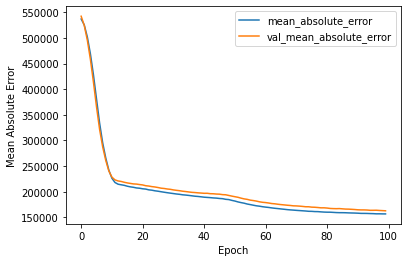

In [ ]:
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.legend(['mean_absolute_error','val_mean_absolute_error'])

In [ ]:
y_test

array([[530000.],
       [387000.],
       [324900.],
       ...,
       [824000.],
       [292000.],
       [510000.]])

#Model Predictions

In [ ]:
y_pred=model.predict(X_test)

136/136 [==============================] - 0s 2ms/step


In [ ]:
model.evaluate(X_test, y_test)

136/136 [==============================] - 0s 2ms/step - loss: 253244.7500 - mean_absolute_error: 162573.8281


[253244.75, 162573.828125]

#Different Accuracy Metrics on Prediction

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squred Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance Score:',metrics.explained_variance_score(y_test,y_pred))

Mean Absolute Error: 162573.79430102266
Mean Squred Error: 78457206628.66516
Root Mean Squared Error: 280102.1360658736
Variance Score: 0.48055716964745554


#Q.Explain the graph plotted above based on fitting of model.Explain how you can analyse overfitting underfitting and normal graph.
sol:-The training,validation and testing accuracy is almost similar so the model is a good model.

Underfitting means that your model makes accurate, but initially incorrect predictions. In this case, train error is large and val/test error is large too.

Overfitting means that your model makes not accurate predictions. In this case, train error is very small and val/test error is large.

When you find a good model, train error is small (but larger than in the case of overfitting), and val/test error is small too.

#Q.What are the steps to avoid overfitting and underfitting.
Handling Overfitting:

Increase training data.<br>
Reduce model complexity.<br>
Early stopping during the training phase (have an eye over the loss over the training period as soon as loss begins to increase stop training).<br>
Ridge Regularization and Lasso Regularization<br>
Use dropout for neural networks to tackle overfitting.<br>

Handling Underfitting:

Increase model complexity<br>
Increase the number of features, performing feature engineering<br>
Remove noise from the data.<br>
Increase the number of epochs or increase the duration of training to get better results.<br>
